### Initial project set up.

In [2]:
# Install necessary dependencies and modules.
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import json



In [3]:
# Function to fetch data using yfinance
def fetch_yfinance_data(symbol):
    # Fetch the stock data for the given symbol
    stock_data = yf.download(symbol, start='2020-01-01', end='2022-12-31', progress=False)
    stock_data['Company'] = symbol  # Add a column for company name
    return stock_data.reset_index()  # Reset index to have 'Date' as a column


### Data fetching codes by industry: Telecom - Oil.

In [4]:
# Define oil stock symbols
oil_symbols = {
    'Exxon Mobile': 'XOM',
    'Chevron': 'CVX',
    'ConocoPhillips': 'COP'
}

# Fetch data for Exxon Mobile, Chevron, and ConocoPhillips for Oil Stocks Analysis
oil_stock_data = {}
for company, oil_symbol in oil_symbols.items():
    oil_stock_data[company] = fetch_yfinance_data(oil_symbol)


In [5]:
# Define telecom stock symbols
tele_symbols = {
    'AT&T': 'T',
    'T-Mobile': 'TMUS',
    'Verizon': 'VZ'
}

# Fetch data for AT&T, T-Mobile, and Verizon for Telecom Stock Analysis
tele_stock_data = {}
for company, tele_symbol in tele_symbols.items():
    tele_stock_data[company] = fetch_yfinance_data(tele_symbol)

### Data Cleaning and Organization.

In [6]:
# Convert the Tele Date column to datetime format
tele_stock_data = {company: tele_stock_data[company].copy() for company in tele_stock_data}  # Ensure we work with a copy

for company in tele_stock_data:
    tele_stock_data[company]['Date'] = pd.to_datetime(tele_stock_data[company]['Date'])

# Combine the individual company DataFrames into a single DataFrame for cleaning
combined_tele_data = pd.concat(tele_stock_data.values(), ignore_index=True)

# Sort the data by Company and Date
combined_tele_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_tele_data.ffill(inplace=True)  # Forward fill
combined_tele_data.bfill(inplace=True)  # Backward fill

# Display the cleaned and combined data
combined_tele_data.head(-1)

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2020-01-02,29.577040,29.622356,29.237160,29.350452,20.066734,43165445,T
1,2020-01-03,29.138973,29.607250,29.131420,29.501511,20.170010,36296666,T
2,2020-01-06,29.448641,29.569487,29.320242,29.531721,20.190668,51229797,T
3,2020-01-07,29.516617,29.682779,29.441088,29.645016,20.268124,37337462,T
4,2020-01-08,29.705439,29.871601,29.675226,29.735649,20.330091,53645832,T
...,...,...,...,...,...,...,...,...
2262,2022-12-22,37.680000,38.320000,37.369999,38.310001,33.459145,26865300,VZ
2263,2022-12-23,38.310001,38.540001,37.919998,38.410000,33.546474,16918300,VZ
2264,2022-12-27,38.490002,39.400002,38.320000,39.250000,34.280117,25315900,VZ
2265,2022-12-28,39.189999,39.660000,38.590000,38.810001,33.895824,21793200,VZ


In [7]:
# Convert the Tele Date column to datetime format
tele_stock_data = {company: tele_stock_data[company].copy() for company in tele_stock_data}  # Ensure we work with a copy

for company in tele_stock_data:
    tele_stock_data[company]['Date'] = pd.to_datetime(tele_stock_data[company]['Date'])

# Combine the individual company DataFrames into a single DataFrame for cleaning
combined_tele_data = pd.concat(tele_stock_data.values(), ignore_index=True)

# Sort the data by Company and Date
combined_tele_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_tele_data.ffill(inplace=True)  # Forward fill
combined_tele_data.bfill(inplace=True)  # Backward fill

# Extract year and quarter
combined_tele_data['Year'] = combined_tele_data['Date'].dt.year
combined_tele_data['Quarter'] = combined_tele_data['Date'].dt.to_period('Q')

# Define the mapping of symbols to full company names
company_name_mapping = {
     'T': 'AT&T',
    'TMUS': 'T-Mobile',
    'VZ': 'Verizon'
}

# Assuming 'filtered_oil_data' is already available, we'll map the company names accordingly
combined_tele_data['Company'] = combined_tele_data['Company'].map(company_name_mapping)

# Save the cleaned and filtered Telecom data to a CSV file
combined_tele_data.to_csv('outputs/combined_tele_data.csv', index=False)

# Output to check if data is cleaned properly
combined_tele_data.head(-1)



,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Quarter
0,2020-01-02,29.577040,29.622356,29.237160,29.350452,20.066734,43165445,AT&T,2020,2020Q1
1,2020-01-03,29.138973,29.607250,29.131420,29.501511,20.170010,36296666,AT&T,2020,2020Q1
2,2020-01-06,29.448641,29.569487,29.320242,29.531721,20.190668,51229797,AT&T,2020,2020Q1
3,2020-01-07,29.516617,29.682779,29.441088,29.645016,20.268124,37337462,AT&T,2020,2020Q1
4,2020-01-08,29.705439,29.871601,29.675226,29.735649,20.330091,53645832,AT&T,2020,2020Q1
...,...,...,...,...,...,...,...,...,...,...
2262,2022-12-22,37.680000,38.320000,37.369999,38.310001,33.459145,26865300,Verizon,2022,2022Q4
2263,2022-12-23,38.310001,38.540001,37.919998,38.410000,33.546474,16918300,Verizon,2022,2022Q4
2264,2022-12-27,38.490002,39.400002,38.320000,39.250000,34.280117,25315900,Verizon,2022,2022Q4
2265,2022-12-28,39.189999,39.660000,38.590000,38.810001,33.895824,21793200,Verizon,2022,2022Q4


In [8]:
# Convert the Oil Date column to datetime format
oil_stock_data = {company: oil_stock_data[company].copy() for company in oil_stock_data}  # Ensure we work with a copy

for company in oil_stock_data:
    oil_stock_data[company]['Date'] = pd.to_datetime(oil_stock_data[company]['Date'])

# Combine the individual company DataFrames into a single DataFrame for cleaning
combined_oil_data = pd.concat(oil_stock_data.values(), ignore_index=True)

# Sort the data by Company and Date
combined_oil_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_oil_data.ffill(inplace=True)  # Forward fill
combined_oil_data.bfill(inplace=True)  # Backward fill


# Extract year and quarter
combined_oil_data['Year'] = combined_oil_data['Date'].dt.year
combined_oil_data['Quarter'] = combined_oil_data['Date'].dt.to_period('Q')

# Define the mapping of symbols to full company names
company_name_mapping = {
    'XOM': 'Exxon Mobil',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips'
}

# Assuming 'combined_oil_data' is already available, we'll map the company names accordingly
combined_oil_data['Company'] = combined_oil_data['Company'].map(company_name_mapping)

# Save the cleaned and filtered Oil data to a CSV file
combined_oil_data.to_csv('outputs/combined_oil_data.csv', index=False)

# Output to check if data is cleaned properly
print(combined_oil_data.head(-1))


           Date        Open        High         Low       Close   Adj Close  \
1512 2020-01-02   65.279999   65.680000   64.849998   65.459999   54.762161   
1513 2020-01-03   67.040001   67.129997   65.070000   65.699997   54.962933   
1514 2020-01-06   66.279999   66.940002   65.879997   66.480003   55.615471   
1515 2020-01-07   66.440002   66.489998   65.739998   66.480003   55.615471   
1516 2020-01-08   66.449997   66.629997   64.519997   64.940002   54.327145   
...         ...         ...         ...         ...         ...         ...   
750  2022-12-22  107.889999  108.190002  104.099998  105.879997   99.820656   
751  2022-12-23  106.949997  108.739998  106.900002  108.680000  102.460426   
752  2022-12-27  109.269997  110.470001  108.830002  110.190002  103.884018   
753  2022-12-28  109.910004  110.000000  107.900002  108.379997  102.177589   
754  2022-12-29  107.989998  109.720001  107.989998  109.199997  102.950661   

        Volume         Company  Year Quarter  
1512

### Stock Analysis.

### Percentage Change calculation: Measures the growth or decline in stock prices over a period, helping to identify trends and compare performance across different time frames.

C:\Users\cassi\AppData\Local\Temp\ipykernel_14432\1902377369.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_oil_percentage_change = combined_oil_data.groupby(['Company', 'Quarter'], as_index=False).apply(


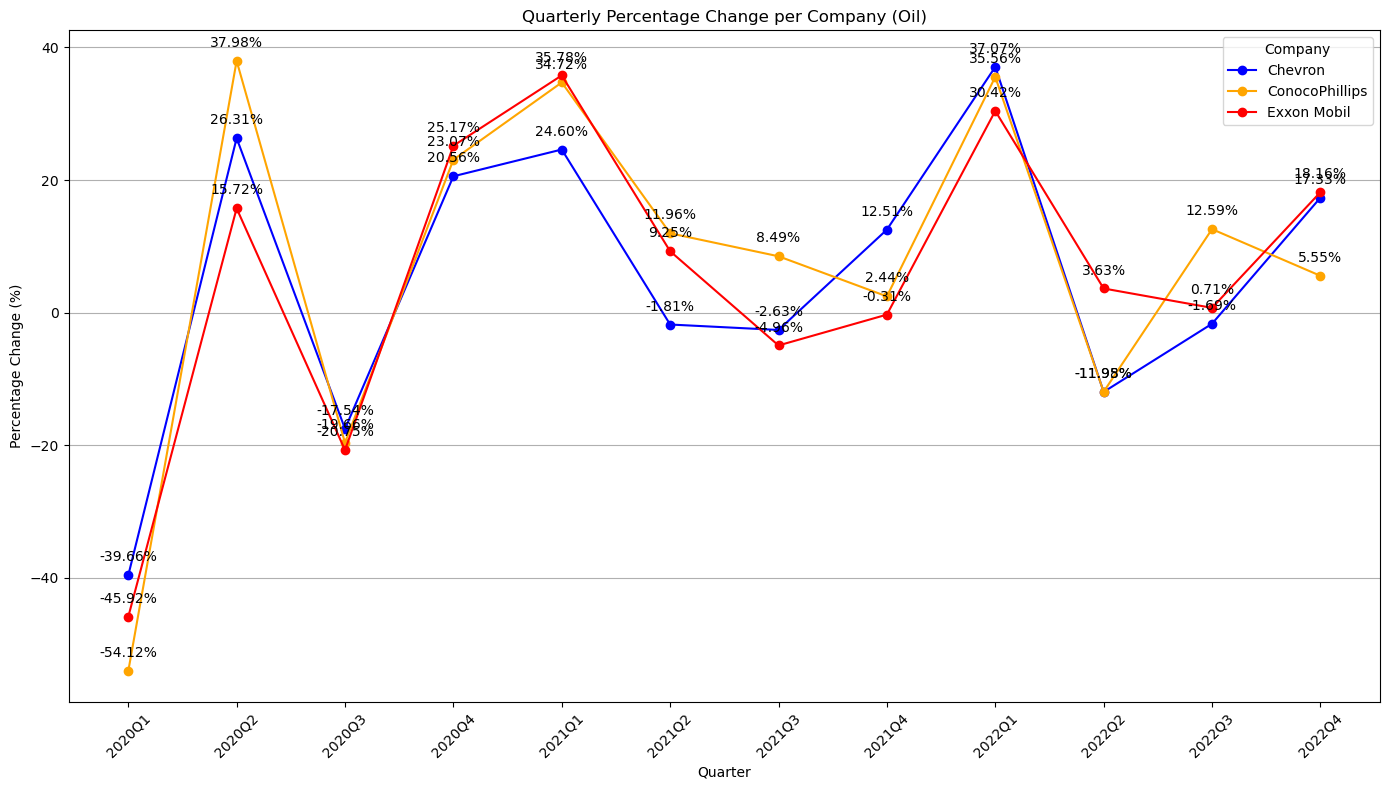

In [9]:
# Calculate the percentage change in Oil Stock for each quarter
quarterly_oil_percentage_change = combined_oil_data.groupby(['Company', 'Quarter'], as_index=False).apply(
    lambda x: pd.Series({
        'Percentage Change': (x.loc[x['Date'].idxmax()]['Open'] - x.loc[x['Date'].idxmin()]['Close']) / x.loc[x['Date'].idxmin()]['Close'] * 100
    })
)

# Convert the 'Quarter' column to string for plotting purposes
quarterly_oil_percentage_change['Quarter'] = quarterly_oil_percentage_change['Quarter'].astype(str)

# Define the colors for each company using the stock symbols instead of full company names
oil_colors = {'Exxon Mobil': 'Red', 'Chevron': 'Blue', 'ConocoPhillips': 'Orange'}

# Plot the quarterly percentage change
plt.figure(figsize=(14, 8))

for company in quarterly_oil_percentage_change['Company'].unique():
    company_data = quarterly_oil_percentage_change[quarterly_oil_percentage_change['Company'] == company]
    
    # Ensure the symbol matches the color dictionary key
    plt.plot(company_data['Quarter'], company_data['Percentage Change'], marker='o', label=company, color=oil_colors[company])
    
    # Annotate each percentage change by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Percentage Change']:.2f}%", 
                     (row['Quarter'], row['Percentage Change']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Percentage Change per Company (Oil)')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Company')
plt.grid(axis='y')  # Add grid lines on the y-axis for clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits properly
plt.savefig('outputs/oil_stock_change.png')
plt.show()



C:\Users\cassi\AppData\Local\Temp\ipykernel_14432\3317940809.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_tele_percentage_change = combined_tele_data.groupby(['Company', 'Quarter'], as_index=False).apply(


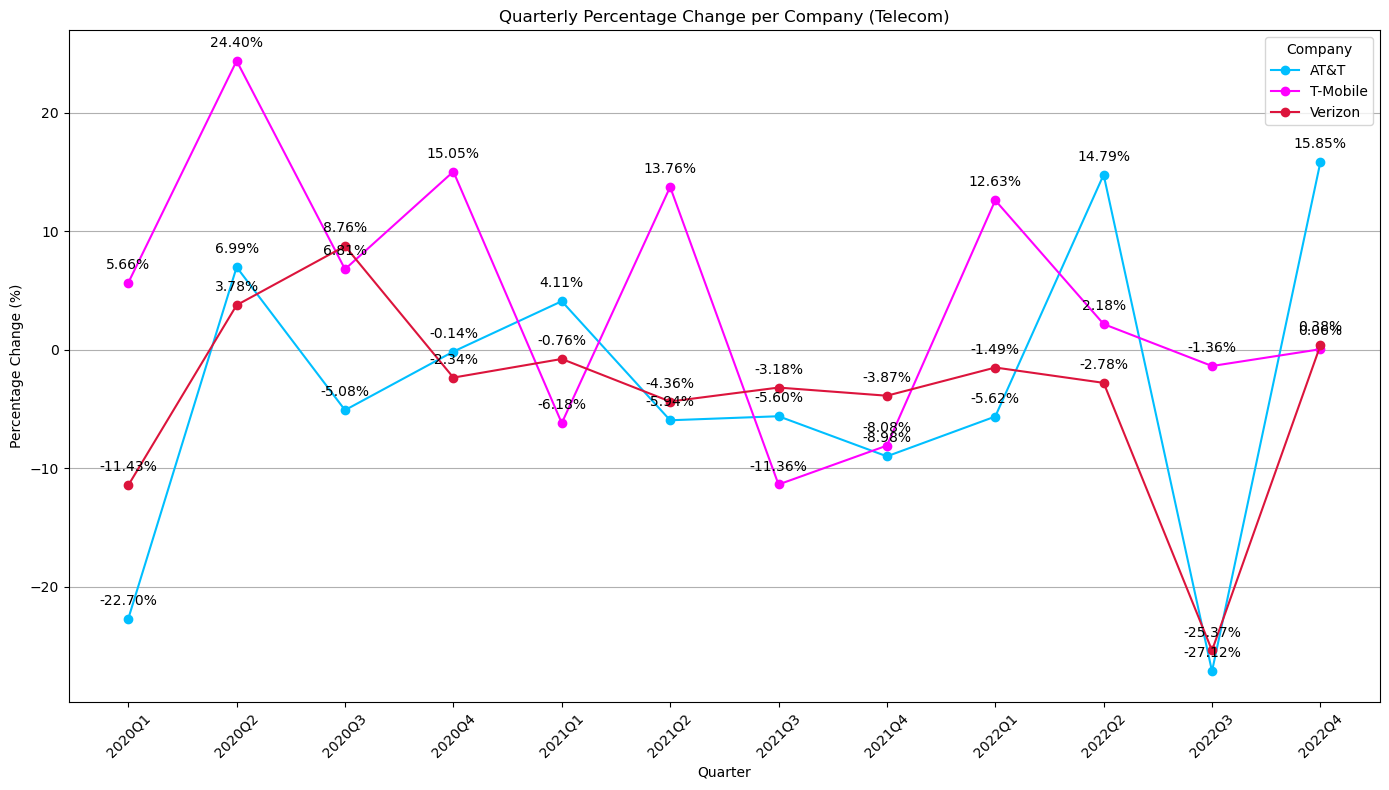

In [10]:
# Calculate the percentage change in Telecom Stock for each quarter
quarterly_tele_percentage_change = combined_tele_data.groupby(['Company', 'Quarter'], as_index=False).apply(
    lambda x: pd.Series({
        'Percentage Change': (x.loc[x['Date'].idxmax()]['Open'] - x.loc[x['Date'].idxmin()]['Close']) / x.loc[x['Date'].idxmin()]['Close'] * 100
    })
)

# Convert the 'Quarter' column to string for proper formatting during plotting
quarterly_tele_percentage_change['Quarter'] = quarterly_tele_percentage_change['Quarter'].astype(str)

# Define the colors using the stock symbols as keys
tele_colors = {'AT&T': 'Deepskyblue', 'T-Mobile': 'Fuchsia', 'Verizon': 'Crimson'}

# Plot the quarterly percentage change
plt.figure(figsize=(14, 8))

for company in quarterly_tele_percentage_change['Company'].unique():
    company_data = quarterly_tele_percentage_change[quarterly_tele_percentage_change['Company'] == company]
    
    # Ensure the symbol matches the color dictionary key
    plt.plot(company_data['Quarter'], company_data['Percentage Change'], marker='o', label=company, color=tele_colors[company])
    
    # Annotate each percentage change by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Percentage Change']:.2f}%", 
                     (row['Quarter'], row['Percentage Change']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Percentage Change per Company (Telecom)')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Company')
plt.grid(axis='y')  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.tight_layout()  # Ensure the plot fits well
plt.savefig('outputs/telecom_stock_change.png')  # Save the plot as PNG
plt.show()


### Stock Volume Change: Indicates the trading activity and liquidity of a stock, reflecting investor interest and potential price movements.

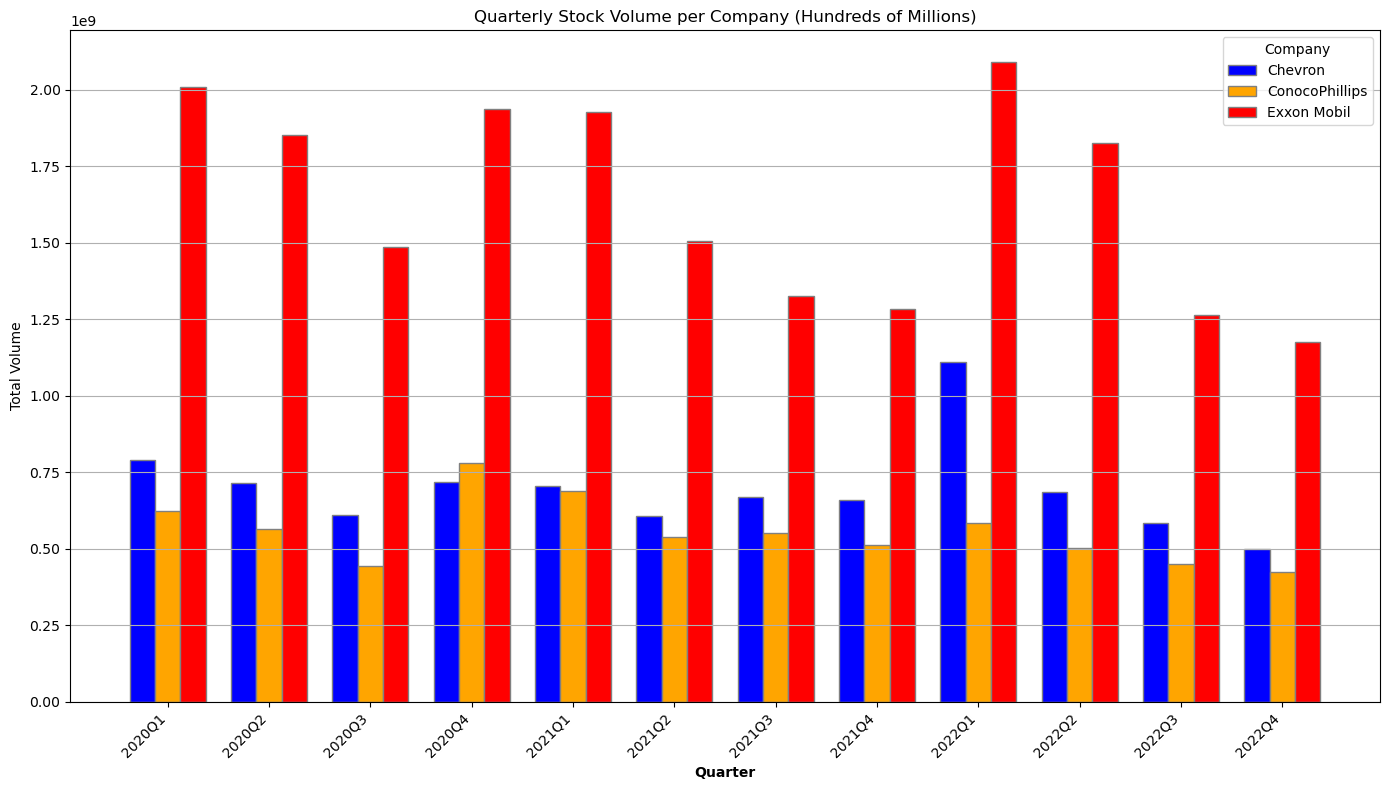

In [11]:
# Calculate the quarterly Oil Stock Volume change per quarter.
quarterly_oil_volume = combined_oil_data.groupby(['Company', 'Quarter'], as_index=False).agg({
    'Volume': 'sum'
})

# Convert the Quarter to a string for plotting due to possible errors.
quarterly_oil_volume['Quarter'] = quarterly_oil_volume['Quarter'].astype(str)

# Get unique quarters and companies
unique_quarters = quarterly_oil_volume['Quarter'].unique()
unique_companies = quarterly_oil_volume['Company'].unique()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(unique_quarters))  # First set of positions
r2 = [x + bar_width for x in r1]  # Second set of positions
r3 = [x + bar_width for x in r2]  # Third set of positions

# Plot the bars
plt.figure(figsize=(14, 8))

for i, company in enumerate(unique_companies):
    company_data = quarterly_oil_volume[quarterly_oil_volume['Company'] == company]
    positions = [x + i * bar_width for x in r1]  # Adjust position for each company
    plt.bar(positions, company_data['Volume'], width=bar_width, edgecolor='grey', label=company, color=oil_colors[company])

# Plot visual formatting.
# Add xticks on the middle of the group bars
plt.xlabel('Quarter', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(unique_quarters))], unique_quarters)

plt.title('Quarterly Stock Volume per Company (Hundreds of Millions)')
plt.ylabel('Total Volume')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/oil_stock_volume.png')
plt.show()


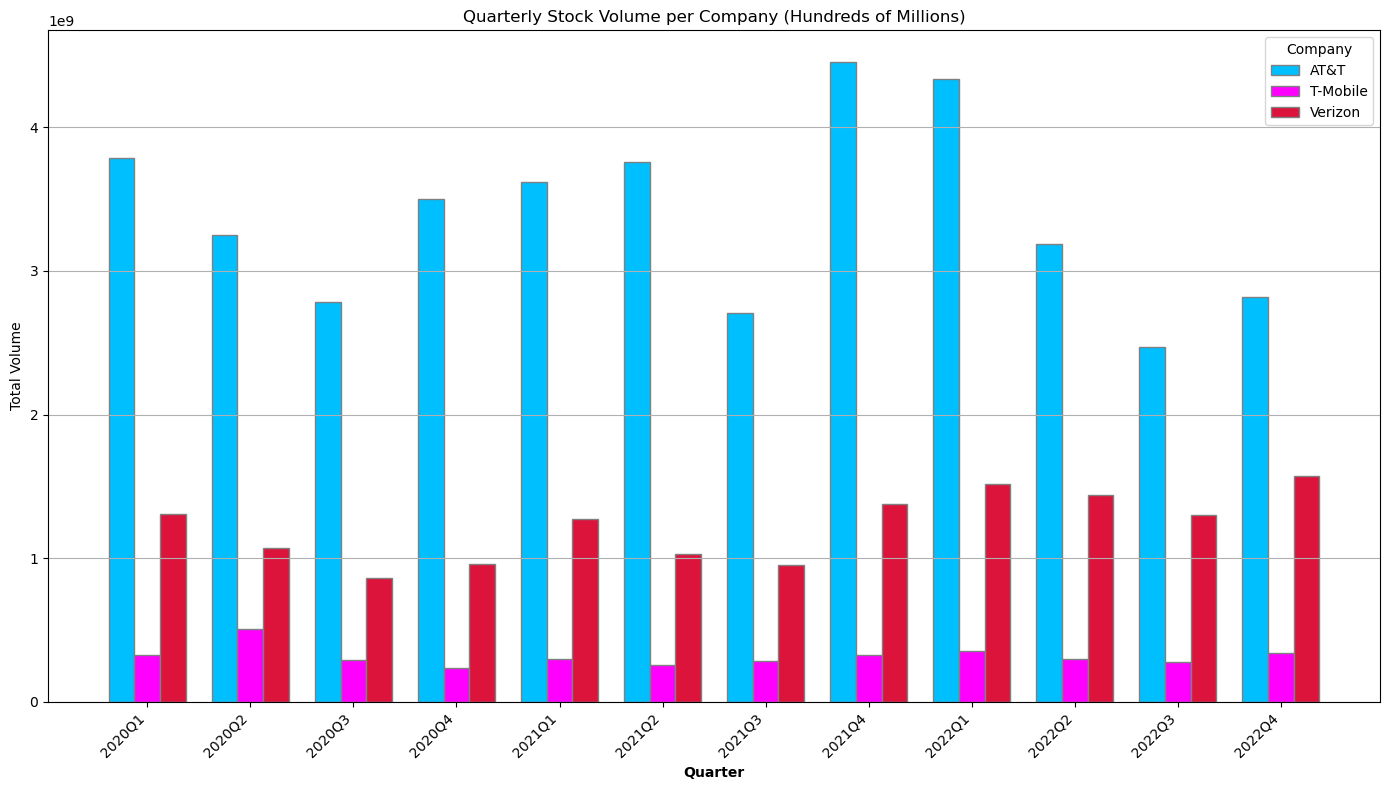

In [12]:
# Calculate the quarterly Telecom Stock Volume change per quarter
quarterly_tele_volume = combined_tele_data.groupby(['Company', 'Quarter'], as_index=False).agg({
    'Volume': 'sum'
})

# Convert the Quarter to a string for plotting
quarterly_tele_volume['Quarter'] = quarterly_tele_volume['Quarter'].astype(str)

# Get unique quarters and companies
unique_quarters = quarterly_tele_volume['Quarter'].unique()
unique_companies = quarterly_tele_volume['Company'].unique()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(unique_quarters))  # First set of positions
r2 = [x + bar_width for x in r1]  # Second set of positions
r3 = [x + bar_width for x in r2]  # Third set of positions

# Plot the bars
plt.figure(figsize=(14, 8))

for i, company in enumerate(unique_companies):
    company_data = quarterly_tele_volume[quarterly_tele_volume['Company'] == company]
    positions = [x + i * bar_width for x in r1]  # Adjust position for each company
    plt.bar(positions, company_data['Volume'], width=bar_width, edgecolor='grey', label=company, color=tele_colors[company])

# Plot visual formatting
# Add xticks on the middle of the group bars
plt.xlabel('Quarter', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(unique_quarters))], unique_quarters)

plt.title('Quarterly Stock Volume per Company (Hundreds of Millions)')
plt.ylabel('Total Volume')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/tele_stock_volume.png')
plt.show()


### Standard Deviation (Volatility): Assesses the risk associated with a stock by measuring the variability of its returns, aiding in risk management and investment decisions.

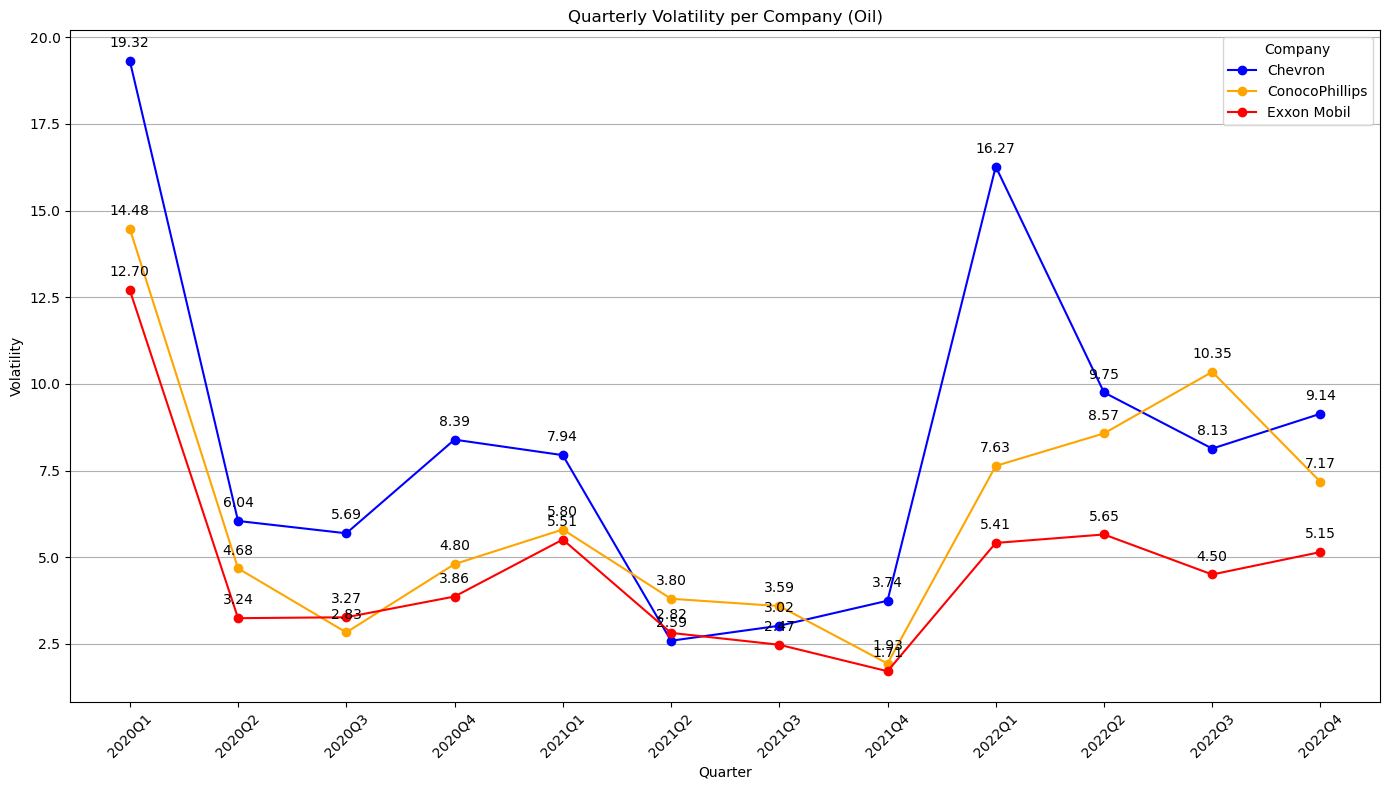

,Company,Quarter,Volatility
0,Chevron,2020Q1,19.319348
1,Chevron,2020Q2,6.044198
2,Chevron,2020Q3,5.688777
3,Chevron,2020Q4,8.390445
4,Chevron,2021Q1,7.943149


In [13]:
# Calculate the standard deviation (volatility) in oil Stock for each quarter
quarterly_oil_volatility = combined_oil_data.groupby(['Company', 'Quarter'], as_index=False)['Close'].std()
quarterly_oil_volatility.rename(columns={'Close': 'Volatility'}, inplace=True)

# Convert the 'Quarter' column to string for plotting
quarterly_oil_volatility['Quarter'] = quarterly_oil_volatility['Quarter'].astype(str)

# Plot the quarterly volatility
plt.figure(figsize=(14, 8))

for company in quarterly_oil_volatility['Company'].unique():
    company_data = quarterly_oil_volatility[quarterly_oil_volatility['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Volatility'], marker='o', label=company, color=oil_colors[company])
    
    # Annotate each volatility by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Volatility']:.2f}", 
                     (row['Quarter'], row['Volatility']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Volatility per Company (Oil)')
plt.xlabel('Quarter')
plt.ylabel('Volatility')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/oil_volatility.png')
plt.show()

# Output the quarterly oil volatility data
quarterly_oil_volatility.head()


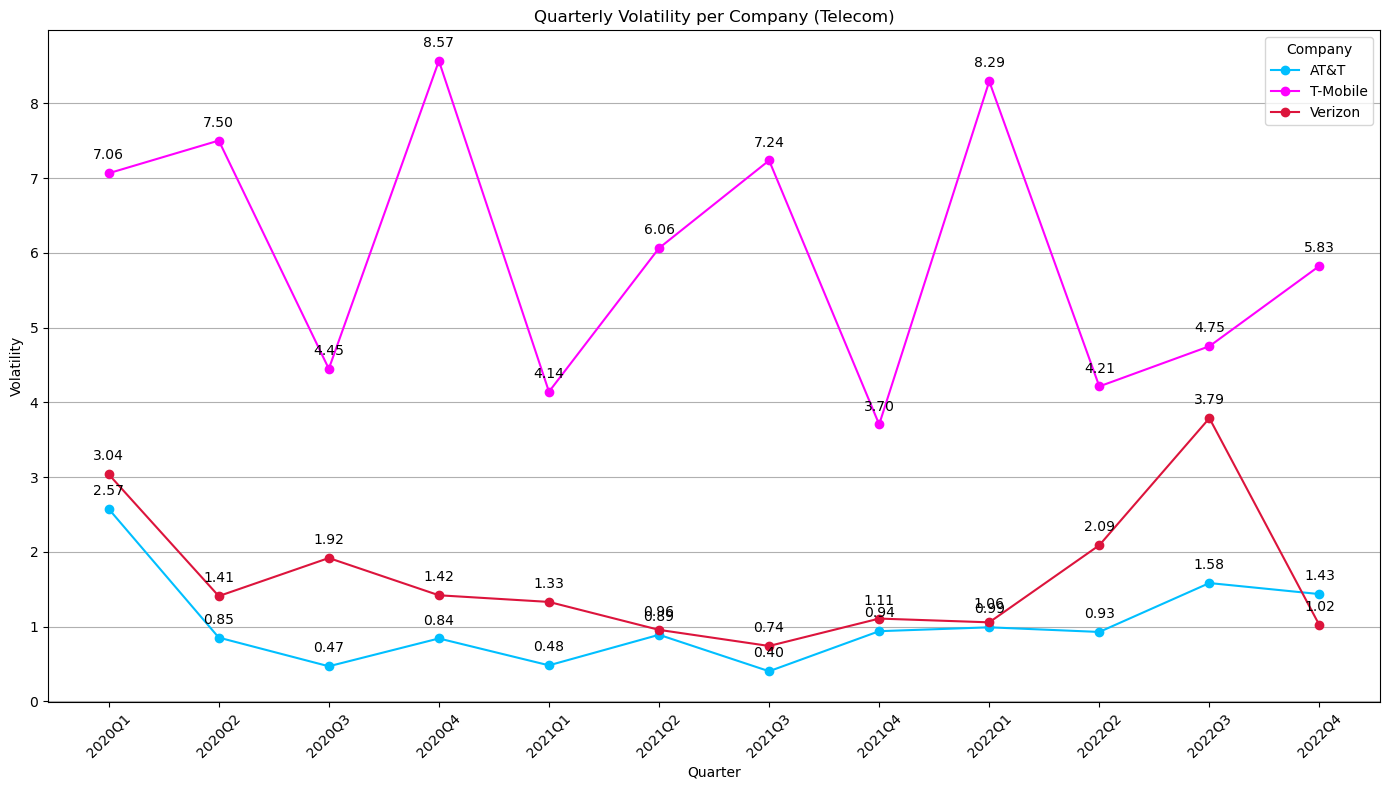

,Company,Quarter,Volatility
0,AT&T,2020Q1,2.574188
1,AT&T,2020Q2,0.852841
2,AT&T,2020Q3,0.469041
3,AT&T,2020Q4,0.841316
4,AT&T,2021Q1,0.481606


In [14]:
# Calculate the standard deviation (volatility) in telecom Stock for each quarter
quarterly_tele_volatility = combined_tele_data.groupby(['Company', 'Quarter'], as_index=False)['Close'].std()
quarterly_tele_volatility.rename(columns={'Close': 'Volatility'}, inplace=True)

# Convert the 'Quarter' column to string for plotting
quarterly_tele_volatility['Quarter'] = quarterly_tele_volatility['Quarter'].astype(str)

# Plot the quarterly volatility
plt.figure(figsize=(14, 8))

for company in quarterly_tele_volatility['Company'].unique():
    company_data = quarterly_tele_volatility[quarterly_tele_volatility['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Volatility'], marker='o', label=company, color=tele_colors[company])
    
    # Annotate each volatility by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Volatility']:.2f}", 
                     (row['Quarter'], row['Volatility']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Volatility per Company (Telecom)')
plt.xlabel('Quarter')
plt.ylabel('Volatility')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/telecom_volatility.png')
plt.show()

# Output the quarterly telecom volatility data
quarterly_tele_volatility.head()


### Return on Investment (ROI): Evaluates the profitability of an investment, enabling investors to gauge the efficiency of their investment choices and compare different investment opportunities.

C:\Users\cassi\AppData\Local\Temp\ipykernel_14432\3927072913.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_tele_roi = combined_tele_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()


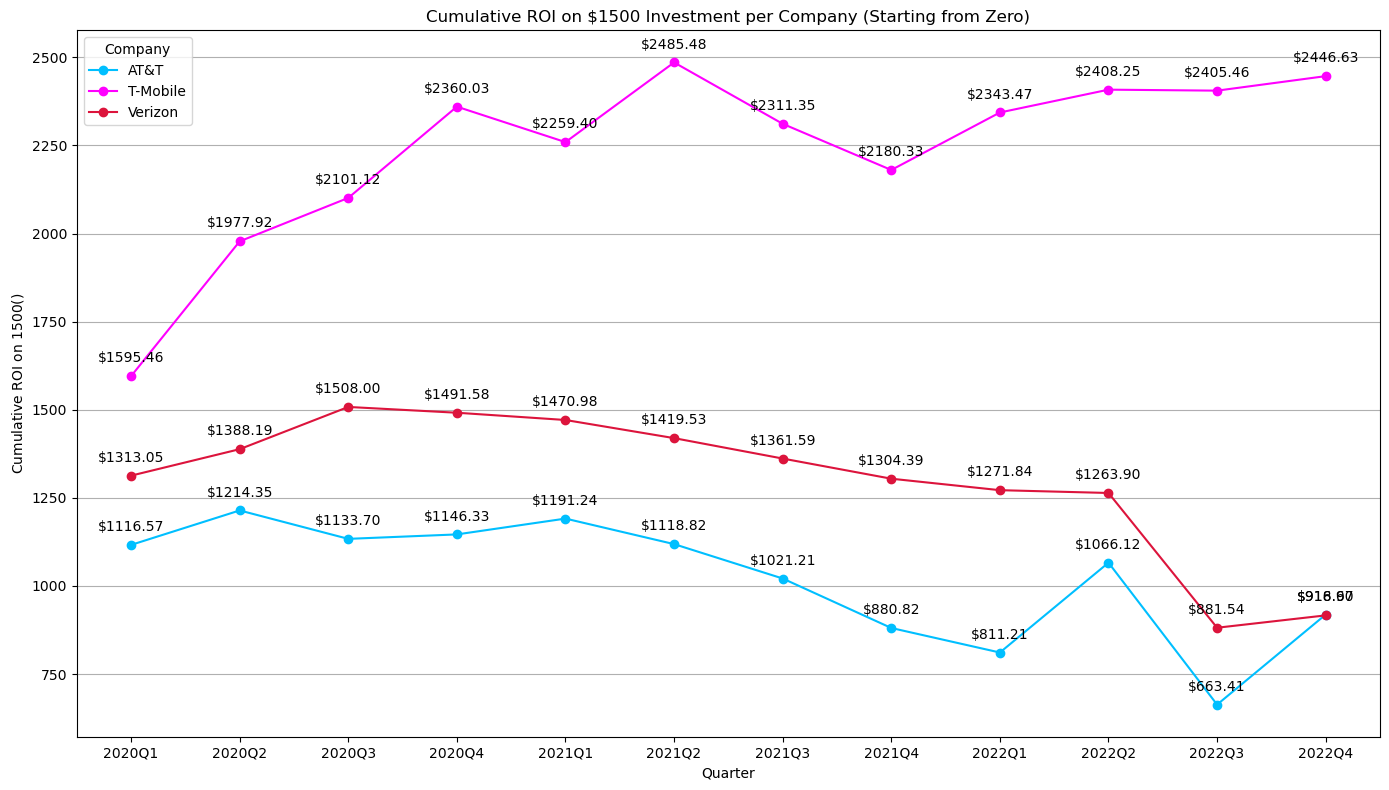

,Company,Quarter,Quarter ROI (%),ROI on $1500 ($),Cumulative ROI on $1500 ($),Cumulative ROI (%)
3,AT&T,2020Q1,-25.561797,-383.426957,1116.573043,-25.561797
4,AT&T,2020Q2,6.518678,97.780175,1214.353217,-19.043119
5,AT&T,2020Q3,-5.376697,-80.650461,1133.702757,-24.419816
6,AT&T,2020Q4,0.841514,12.622708,1146.325465,-23.578302
7,AT&T,2021Q1,2.994213,44.913188,1191.238653,-20.584090
8,AT&T,2021Q2,-4.828040,-72.420594,1118.818059,-25.412129
9,AT&T,2021Q3,-6.507439,-97.611592,1021.206467,-31.919569
10,AT&T,2021Q4,-9.358886,-140.383296,880.823171,-41.278455
11,AT&T,2022Q1,-4.640839,-69.612579,811.210592,-45.919294
12,AT&T,2022Q2,16.994266,254.913986,1066.124578,-28.925028


In [15]:
# Get the opening price on 2020-01-02 for each company (change the date if necessary)
initial_prices_tele = combined_tele_data[combined_tele_data['Date'] == pd.Timestamp('2020-01-02')].set_index('Company')['Open']

# Calculate the ROI based on quarter opening and closing prices of the telecom Stocks Data
def tele_roi(group):
    opening_price = group.iloc[0]['Open']
    closing_price = group.iloc[-1]['Close']
    roi_percentage = ((closing_price - opening_price) / opening_price) * 100
    return pd.Series({
        'Quarter ROI (%)': roi_percentage,
        'ROI on $1500 ($)': (roi_percentage / 100) * 1500
    })

# Apply the ROI calculation to each company for each quarter
quarterly_tele_roi = combined_tele_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()

# Initialize cumulative ROI with zero
initial_investment = pd.DataFrame({
    'Company': initial_prices_tele.index,
    'Quarter': '0',
    'Quarter ROI (%)': 0,
    'ROI on $1500 ($)': 0,
    'Cumulative ROI on $1500 ($)': 1500  # Starting point
})

# Ensure that the cumulative ROI starts from zero for each company
quarterly_tele_roi['Cumulative ROI on $1500 ($)'] = quarterly_tele_roi.groupby('Company')['ROI on $1500 ($)'].cumsum() + 1500

# Add the initial investment row and sort by company and quarter
quarterly_tele_roi = pd.concat([initial_investment, quarterly_tele_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Convert the 'Quarter' column to string
quarterly_tele_roi['Quarter'] = quarterly_tele_roi['Quarter'].astype(str)

# Remove the final zero point at the end for each company
quarterly_tele_roi = quarterly_tele_roi[quarterly_tele_roi['Quarter'] != '0']

# Add the new column for Cumulative ROI as a percentage of the initial $1500 investment
quarterly_tele_roi['Cumulative ROI (%)'] = ((quarterly_tele_roi['Cumulative ROI on $1500 ($)'] / 1500) *100) - 100

# Plot the cumulative ROI on a $1500 investment starting from zero
plt.figure(figsize=(14, 8))

for company in quarterly_tele_roi['Company'].unique():
    company_data = quarterly_tele_roi[quarterly_tele_roi['Company'] == company]
    plt.plot(company_data['Quarter'].astype(str), company_data['Cumulative ROI on $1500 ($)'], marker='o', label=company, color=tele_colors[company])

    # Annotate each point with the Y value
    for i, row in company_data.iterrows():
        plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                     xytext=(0, 10), ha='center')

# Plot visual formatting.
# Define the x-tick positions and labels
xticks_positions = range(len(quarterly_tele_roi['Quarter'].unique()))
xticks_labels = quarterly_tele_roi['Quarter'].unique()

plt.xticks(xticks_positions, xticks_labels)

# Set x-axis limits to include space before the first quarter
plt.xlim(left=-0.5, right=len(xticks_positions)-0.5)

plt.title('Cumulative ROI on $1500 Investment per Company (Starting from Zero)')
plt.xlabel('Quarter')
plt.ylabel('Cumulative ROI on $1500 ($)')
plt.legend(title='Company')
plt.grid(True, axis='y')  # Horizontal grid lines only
plt.tight_layout()
plt.savefig('outputs/tele_roi.png')
plt.show()

quarterly_tele_roi.head(-5)


C:\Users\cassi\AppData\Local\Temp\ipykernel_14432\3494867712.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_oil_roi = combined_oil_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()


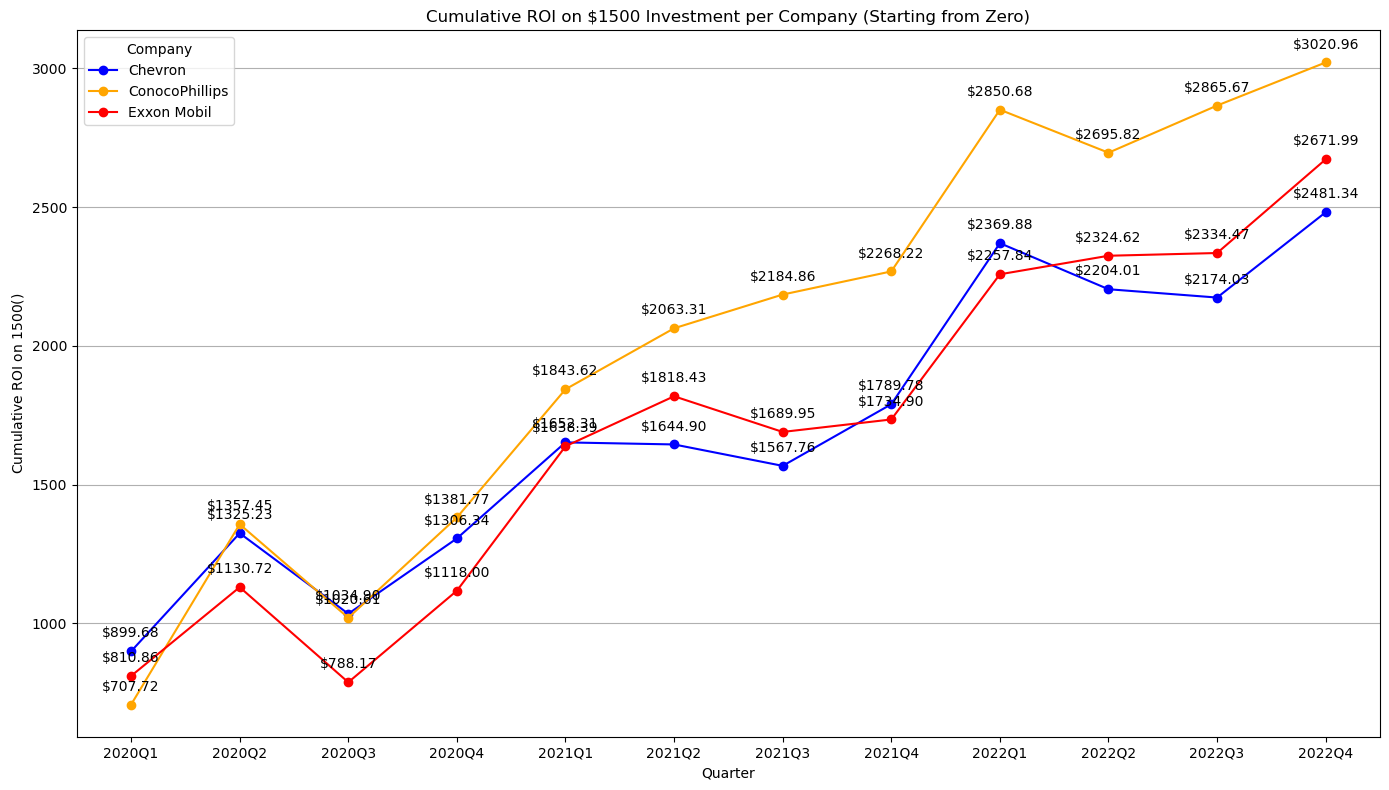

,Company,Quarter,Quarter ROI (%),ROI on $1500 ($),Cumulative ROI on $1500 ($),Cumulative ROI (%)
3,Chevron,2020Q1,-40.021521,-600.322814,899.677186,-40.021521
4,Chevron,2020Q2,28.370020,425.550294,1325.227480,-11.651501
5,Chevron,2020Q3,-19.354838,-290.322564,1034.904916,-31.006339
6,Chevron,2020Q4,18.095363,271.430452,1306.335368,-12.910975
7,Chevron,2021Q1,23.065178,345.977669,1652.313037,10.154202
8,Chevron,2021Q2,-0.494019,-7.410283,1644.902754,9.660184
9,Chevron,2021Q3,-5.142590,-77.138852,1567.763902,4.517593
10,Chevron,2021Q4,14.801406,222.021088,1789.784990,19.318999
11,Chevron,2022Q1,38.673143,580.097143,2369.882133,57.992142
12,Chevron,2022Q2,-11.057870,-165.868044,2204.014089,46.934273


In [16]:
# Get the opening price on 2020-01-02 for each company (change the date if necessary)
initial_prices_oil = combined_oil_data[combined_oil_data['Date'] == pd.Timestamp('2020-01-02')].set_index('Company')['Open']

# Calculate the ROI based on quarter opening and closing prices of the telecom Stocks Data
def tele_roi(group):
    opening_price = group.iloc[0]['Open']
    closing_price = group.iloc[-1]['Close']
    roi_percentage = ((closing_price - opening_price) / opening_price) * 100
    return pd.Series({
        'Quarter ROI (%)': roi_percentage,
        'ROI on $1500 ($)': (roi_percentage / 100) * 1500
    })

# Apply the ROI calculation to each company for each quarter
quarterly_oil_roi = combined_oil_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()

# Initialize cumulative ROI with zero
initial_investment = pd.DataFrame({
    'Company': initial_prices_oil.index,
    'Quarter': '0',
    'Quarter ROI (%)': 0,
    'ROI on $1500 ($)': 0,
    'Cumulative ROI on $1500 ($)': 1500  # Starting point
})

# Ensure that the cumulative ROI starts from zero for each company
quarterly_oil_roi['Cumulative ROI on $1500 ($)'] = quarterly_oil_roi.groupby('Company')['ROI on $1500 ($)'].cumsum() + 1500

# Add the initial investment row and sort by company and quarter
quarterly_oil_roi = pd.concat([initial_investment, quarterly_oil_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Convert the 'Quarter' column to string
quarterly_oil_roi['Quarter'] = quarterly_oil_roi['Quarter'].astype(str)

# Remove the final zero point at the end for each company
quarterly_oil_roi = quarterly_oil_roi[quarterly_oil_roi['Quarter'] != '0']

# Add the new column for Cumulative ROI as a percentage of the initial $1500 investment
quarterly_oil_roi['Cumulative ROI (%)'] = ((quarterly_oil_roi['Cumulative ROI on $1500 ($)'] / 1500) *100) - 100

# Plot the cumulative ROI on a $1500 investment starting from zero
plt.figure(figsize=(14, 8))

for company in quarterly_oil_roi['Company'].unique():
    company_data = quarterly_oil_roi[quarterly_oil_roi['Company'] == company]
    plt.plot(company_data['Quarter'].astype(str), company_data['Cumulative ROI on $1500 ($)'], marker='o', label=company, color=oil_colors[company])

    # Annotate each point with the Y value
    for i, row in company_data.iterrows():
        plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                     xytext=(0, 10), ha='center')

# Plot visual formatting.
# Define the x-tick positions and labels
xticks_positions = range(len(quarterly_oil_roi['Quarter'].unique()))
xticks_labels = quarterly_oil_roi['Quarter'].unique()

plt.xticks(xticks_positions, xticks_labels)

# Set x-axis limits to include space before the first quarter
plt.xlim(left=-0.5, right=len(xticks_positions)-0.5)

plt.title('Cumulative ROI on $1500 Investment per Company (Starting from Zero)')
plt.xlabel('Quarter')
plt.ylabel('Cumulative ROI on $1500 ($)')
plt.legend(title='Company')
plt.grid(True, axis='y')  # Horizontal grid lines only
plt.tight_layout()
plt.savefig('outputs/tele_roi.png')
plt.show()

quarterly_oil_roi.head(-5)


In [17]:
# Add the initial investment row and sort by company and quarter
quarterly_oil_roi = pd.concat([initial_investment, quarterly_oil_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Remove the final zero point at the end for each company
quarterly_oil_roi = quarterly_oil_roi[quarterly_oil_roi['Quarter'] != '0']

# Reset the index to start from zero after removing the initial investment row
quarterly_oil_roi = quarterly_oil_roi.reset_index(drop=True)

# Convert the 'Quarter' column to string
quarterly_oil_roi['Quarter'] = quarterly_oil_roi['Quarter'].astype(str)

# Add the new column for Cumulative ROI as a percentage of the initial $1500 investment
quarterly_oil_roi['Cumulative ROI (%)'] = ((quarterly_oil_roi['Cumulative ROI on $1500 ($)'] / 1500) *100) - 100
quarterly_oil_roi.head(10)

,Company,Quarter,Quarter ROI (%),ROI on $1500 ($),Cumulative ROI on $1500 ($),Cumulative ROI (%)
0,Chevron,2020Q1,-40.021521,-600.322814,899.677186,-40.021521
1,Chevron,2020Q2,28.370020,425.550294,1325.227480,-11.651501
2,Chevron,2020Q3,-19.354838,-290.322564,1034.904916,-31.006339
3,Chevron,2020Q4,18.095363,271.430452,1306.335368,-12.910975
4,Chevron,2021Q1,23.065178,345.977669,1652.313037,10.154202
5,Chevron,2021Q2,-0.494019,-7.410283,1644.902754,9.660184
6,Chevron,2021Q3,-5.142590,-77.138852,1567.763902,4.517593
7,Chevron,2021Q4,14.801406,222.021088,1789.784990,19.318999
8,Chevron,2022Q1,38.673143,580.097143,2369.882133,57.992142
9,Chevron,2022Q2,-11.057870,-165.868044,2204.014089,46.934273


In [18]:
# Add the initial investment row and sort by company and quarter
quarterly_tele_roi = pd.concat([initial_investment, quarterly_tele_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Remove the final zero point at the end for each company
quarterly_tele_roi = quarterly_tele_roi[quarterly_tele_roi['Quarter'] != '0']

# Reset the index to start from zero after removing the initial investment row
quarterly_tele_roi = quarterly_tele_roi.reset_index(drop=True)

# Convert the 'Quarter' column to string
quarterly_tele_roi['Quarter'] = quarterly_tele_roi['Quarter'].astype(str)

# Add the new column for Cumulative ROI as a percentage of the initial $1500 investment
quarterly_tele_roi['Cumulative ROI (%)'] = ((quarterly_tele_roi['Cumulative ROI on $1500 ($)'] / 1500) *100) - 100
quarterly_tele_roi.head(10)

,Company,Quarter,Quarter ROI (%),ROI on $1500 ($),Cumulative ROI on $1500 ($),Cumulative ROI (%)
0,AT&T,2020Q1,-25.561797,-383.426957,1116.573043,-25.561797
1,AT&T,2020Q2,6.518678,97.780175,1214.353217,-19.043119
2,AT&T,2020Q3,-5.376697,-80.650461,1133.702757,-24.419816
3,AT&T,2020Q4,0.841514,12.622708,1146.325465,-23.578302
4,AT&T,2021Q1,2.994213,44.913188,1191.238653,-20.584090
5,AT&T,2021Q2,-4.828040,-72.420594,1118.818059,-25.412129
6,AT&T,2021Q3,-6.507439,-97.611592,1021.206467,-31.919569
7,AT&T,2021Q4,-9.358886,-140.383296,880.823171,-41.278455
8,AT&T,2022Q1,-4.640839,-69.612579,811.210592,-45.919294
9,AT&T,2022Q2,16.994266,254.913986,1066.124578,-28.925028


In [19]:
# use Groupby: filtered_tele_data + quarterly_tele_percentage_change + quarterly_tele_volume + quarterly_tele_volatility + quarterly_tele_roi
# use groupby: filtered_oil_data + quarterly_oil_percentage_change + quarterly_oil_volume + quarterly_oil_volatility + quarterly_oil_roi

In [20]:
# Combine the DataFrames
combined_telecom_df = pd.concat([
    quarterly_tele_percentage_change,
    quarterly_tele_volume,
    quarterly_tele_volatility,
    quarterly_tele_roi
], axis=1)

# Then proceed with the rest of the code to save the data to JSON

# Remove duplicate columns
combined_telecom_df = combined_telecom_df.loc[:, ~combined_telecom_df.columns.duplicated()]

# Reset the index to make sure all data is included in the JSON
combined_telecom_df = combined_telecom_df.reset_index()

# Convert the DataFrame to a dictionary
telecom_dict = combined_telecom_df.to_dict(orient='records')

# Create a JSON structure
telecom_json = {
    "telecom_data": telecom_dict
}

# Save the JSON to a file
with open('outputs/telecom_database.json', 'w') as json_file:
    json.dump(telecom_json, json_file, indent=4)

print("Data has been saved to 'telecom_database.json'")

# If you want to verify the contents of the JSON file:
with open('outputs/telecom_database.json', 'r') as json_file:
    loaded_data = json.load(json_file)

print("\nFirst record in the JSON file:")
print(json.dumps(loaded_data['telecom_data'][0], indent=4))


Data has been saved to 'telecom_database.json'

First record in the JSON file:
{
    "index": 0,
    "Company": "AT&T",
    "Quarter": "2020Q1",
    "Percentage Change": -22.696858414527078,
    "Volume": 3788275272,
    "Volatility": 2.5741882798392473,
    "Quarter ROI (%)": -25.561797155031822,
    "ROI on $1500 ($)": -383.42695732547736,
    "Cumulative ROI on $1500 ($)": 1116.5730426745226,
    "Cumulative ROI (%)": -25.561797155031826
}


In [21]:
# Combine the DataFrames
combined_oil_df = pd.concat([
    quarterly_oil_percentage_change,
    quarterly_oil_volume, 
    quarterly_oil_volatility,
    quarterly_oil_roi
], axis=1)

# Then proceed with the rest of the code to save the data to JSON

# Remove duplicate columns
combined_oil_df = combined_oil_df.loc[:, ~combined_oil_df.columns.duplicated()]

# Reset the index to make sure all data is included in the JSON
combined_oil_df = combined_oil_df.reset_index()

# Convert the DataFrame to a dictionary
oil_dict = combined_oil_df.to_dict(orient='records')

# Create a JSON structure
oil_json = {
    "oil_data": oil_dict
}

# Save the JSON to a file
with open('outputs/oil_database.json', 'w') as json_file:
    json.dump(oil_json, json_file, indent=4)

print("Data has been saved to 'oil_database.json'")

# If you want to verify the contents of the JSON file:
with open('outputs/oil_database.json', 'r') as json_file:
    loaded_data = json.load(json_file)

print("\nFirst record in the JSON file:")
print(json.dumps(loaded_data['oil_data'][0], indent=4))

combined_oil_df.head(5)

Data has been saved to 'oil_database.json'

First record in the JSON file:
{
    "index": 0,
    "Company": "Chevron",
    "Quarter": "2020Q1",
    "Percentage Change": -39.660712790146164,
    "Volume": 788831500,
    "Volatility": 19.319348062246217,
    "Quarter ROI (%)": -40.021520942975755,
    "ROI on $1500 ($)": -600.3228141446363,
    "Cumulative ROI on $1500 ($)": 899.6771858553637,
    "Cumulative ROI (%)": -40.021520942975755
}


,index,Company,Quarter,Percentage Change,Volume,Volatility,Quarter ROI (%),ROI on $1500 ($),Cumulative ROI on $1500 ($),Cumulative ROI (%)
0,0,Chevron,2020Q1,-39.660713,788831500,19.319348,-40.021521,-600.322814,899.677186,-40.021521
1,1,Chevron,2020Q2,26.312721,716030900,6.044198,28.370020,425.550294,1325.227480,-11.651501
2,2,Chevron,2020Q3,-17.541660,611381100,5.688777,-19.354838,-290.322564,1034.904916,-31.006339
3,3,Chevron,2020Q4,20.562346,717577300,8.390445,18.095363,271.430452,1306.335368,-12.910975
4,4,Chevron,2021Q1,24.601587,705058900,7.943149,23.065178,345.977669,1652.313037,10.154202


In [23]:
# Now, add the "Sector" column to each dataframe
combined_telecom_df['Sector'] = 'Telecom'
combined_oil_df['Sector'] = 'Oil'

# Append the dataframes
combined_df = pd.concat([combined_telecom_df, combined_oil_df], ignore_index=True)

# Save the result as a JSON file
output_path = 'outputs/stocks_database.json'
combined_df.to_json(output_path, orient='records', indent=4)

# Show a preview of the combined dataframe
combined_df.head(), output_path

(   index Company Quarter  Percentage Change      Volume  Volatility  \
 0      0    AT&T  2020Q1         -22.696858  3788275272    2.574188   
 1      1    AT&T  2020Q2           6.987519  3247371887    0.852841   
 2      2    AT&T  2020Q3          -5.083615  2783972152    0.469041   
 3      3    AT&T  2020Q4          -0.140404  3504242716    0.841316   
 4      4    AT&T  2021Q1           4.110060  3620696860    0.481606   
 
    Quarter ROI (%)  ROI on $1500 ($)  Cumulative ROI on $1500 ($)  \
 0       -25.561797       -383.426957                  1116.573043   
 1         6.518678         97.780175                  1214.353217   
 2        -5.376697        -80.650461                  1133.702757   
 3         0.841514         12.622708                  1146.325465   
 4         2.994213         44.913188                  1191.238653   
 
    Cumulative ROI (%)   Sector  
 0          -25.561797  Telecom  
 1          -19.043119  Telecom  
 2          -24.419816  Telecom  
 3      